In [14]:
import control
import numpy as np
import matplotlib.pyplot as plt

import kontrol

seismic_low = kontrol.load_transfer_function("noise_models/seismic_low.pkl")
seismic_mid = kontrol.load_transfer_function("noise_models/seismic_mid.pkl")
seismic_high = kontrol.load_transfer_function("noise_models/seismic_high.pkl")

sts_low = kontrol.load_transfer_function("noise_models/sts_low.pkl")
sts_mid = kontrol.load_transfer_function("noise_models/sts_mid.pkl")
sts_high = kontrol.load_transfer_function("noise_models/sts_high.pkl")

In [15]:
f = np.logspace(-3, 3, 1024)

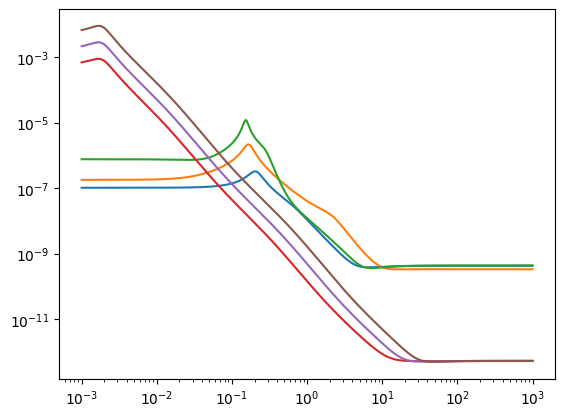

In [16]:
plt.loglog(f, abs(seismic_low(1j*2*np.pi*f)))
plt.loglog(f, abs(seismic_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(seismic_high(1j*2*np.pi*f)))

plt.loglog(f, abs(sts_low(1j*2*np.pi*f)))
plt.loglog(f, abs(sts_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(sts_high(1j*2*np.pi*f)))

In [28]:
sc_low_low = kontrol.ComplementaryFilter()  # Low seismic, low sts
sc_low_low.noise1 = seismic_low
sc_low_low.noise2 = sts_low
sc_low_low.weight1 = 1/sts_low
sc_low_low.weight2 = 1/seismic_low
sc_low_low.h2synthesis()

h_trans_low_low, h_sc_low_low = sc_low_low.hinfsynthesis()

In [32]:
sc_low_mid = kontrol.ComplementaryFilter()  # Low seismic, mid sts
sc_low_mid.noise1 = seismic_low
sc_low_mid.noise2 = sts_mid
sc_low_mid.weight1 = 1/sts_mid
sc_low_mid.weight2 = 1/seismic_low
sc_low_mid.h2synthesis()

h_trans_low_mid, h_sc_low_mid = sc_low_mid.hinfsynthesis()

In [33]:
sc_low_high = kontrol.ComplementaryFilter()  # Low seismic, high sts
sc_low_high.noise1 = seismic_low
sc_low_high.noise2 = sts_high
sc_low_high.weight1 = 1/sts_high
sc_low_high.weight2 = 1/seismic_low
sc_low_high.h2synthesis()

h_trans_low_high, h_sc_low_high = sc_low_high.hinfsynthesis()

In [58]:
sc_mid_low = kontrol.ComplementaryFilter()  # mid seismic, low sts
sc_mid_low.noise1 = seismic_mid
sc_mid_low.noise2 = sts_low
sc_mid_low.weight1 = 1/sts_low
sc_mid_low.weight2 = 1/seismic_mid
sc_mid_low.h2synthesis()

h_trans_mid_low, h_sc_mid_low = sc_mid_low.hinfsynthesis()

In [48]:
sc_mid_mid = kontrol.ComplementaryFilter()  # mid seismic, mid sts
sc_mid_mid.noise2 = seismic_mid
sc_mid_mid.noise1 = sts_mid
sc_mid_mid.weight2 = 1/sts_mid
sc_mid_mid.weight1 = 1/seismic_mid
sc_mid_mid.h2synthesis()

h_sc_mid_mid, h_trans_mid_mid = sc_mid_mid.hinfsynthesis()

In [54]:
sc_mid_high = kontrol.ComplementaryFilter()  # mid seismic, high sts
sc_mid_high.noise2 = seismic_mid
sc_mid_high.noise1 = sts_high
sc_mid_high.weight2 = 1/sts_high
sc_mid_high.weight1 = 1/seismic_mid
sc_mid_high.h2synthesis()

h_sc_mid_high, h_trans_mid_high = sc_mid_high.hinfsynthesis()

In [38]:
sc_high_low = kontrol.ComplementaryFilter()  # high seismic, low sts
sc_high_low.noise1 = seismic_high
sc_high_low.noise2 = sts_low
sc_high_low.weight1 = 1/sts_low
sc_high_low.weight2 = 1/seismic_high
sc_high_low.h2synthesis()

h_trans_high_low, h_sc_high_low = sc_high_low.hinfsynthesis()

In [39]:
sc_high_mid = kontrol.ComplementaryFilter()  # high seismic, mid sts
sc_high_mid.noise1 = seismic_high
sc_high_mid.noise2 = sts_mid
sc_high_mid.weight1 = 1/sts_mid
sc_high_mid.weight2 = 1/seismic_high
sc_high_mid.h2synthesis()

h_trans_high_mid, h_sc_high_mid = sc_high_mid.hinfsynthesis()

In [40]:
sc_high_high = kontrol.ComplementaryFilter()  # high seismic, high sts
sc_high_high.noise1 = seismic_high
sc_high_high.noise2 = sts_high
sc_high_high.weight1 = 1/sts_high
sc_high_high.weight2 = 1/seismic_high
sc_high_high.h2synthesis()

h_trans_high_high, h_sc_high_high = sc_high_high.hinfsynthesis()

In [85]:
wc = 0.002*2*np.pi  # 0.002 Hz
order = 3
s = control.tf("s")
prefilter = (s/(s+wc))**order

h_sc_prefilt_low_low = h_sc_low_low * prefilter
h_trans_prefilt_low_low = 1 - h_sc_prefilt_low_low
h_sc_prefilt_low_low = kontrol.TransferFunction(h_sc_prefilt_low_low)

h_sc_prefilt_low_mid = h_sc_low_mid * prefilter
h_trans_prefilt_low_mid = 1 - h_sc_prefilt_low_mid
h_sc_prefilt_low_mid = kontrol.TransferFunction(h_sc_prefilt_low_mid)

h_sc_prefilt_low_high = h_sc_low_high * prefilter
h_trans_prefilt_low_high = 1 - h_sc_prefilt_low_high
h_sc_prefilt_low_high = kontrol.TransferFunction(h_sc_prefilt_low_high)

In [86]:
h_sc_prefilt_mid_low = h_sc_mid_low * prefilter
h_trans_prefilt_mid_low = 1 - h_sc_prefilt_mid_low
h_sc_prefilt_mid_low = kontrol.TransferFunction(h_sc_prefilt_mid_low)

h_sc_prefilt_mid_mid = h_sc_mid_mid * prefilter
h_trans_prefilt_mid_mid = 1 - h_sc_prefilt_mid_mid
h_sc_prefilt_mid_mid = kontrol.TransferFunction(h_sc_prefilt_mid_mid)

h_sc_prefilt_mid_high = h_sc_mid_high * prefilter
h_trans_prefilt_mid_high = 1 - h_sc_prefilt_mid_high
h_sc_prefilt_mid_high = kontrol.TransferFunction(h_sc_prefilt_mid_high)

In [87]:
h_sc_prefilt_high_low = h_sc_high_low * prefilter
h_trans_prefilt_high_low = 1 - h_sc_prefilt_high_low
h_sc_prefilt_high_low = kontrol.TransferFunction(h_sc_prefilt_high_low)

h_sc_prefilt_high_mid = h_sc_high_mid * prefilter
h_trans_prefilt_high_mid = 1 - h_sc_prefilt_high_mid
h_sc_prefilt_high_mid = kontrol.TransferFunction(h_sc_prefilt_high_mid)

h_sc_prefilt_high_high = h_sc_high_high * prefilter
h_trans_prefilt_high_high = 1 - h_sc_prefilt_high_high
h_sc_prefilt_high_high = kontrol.TransferFunction(h_sc_prefilt_high_high)

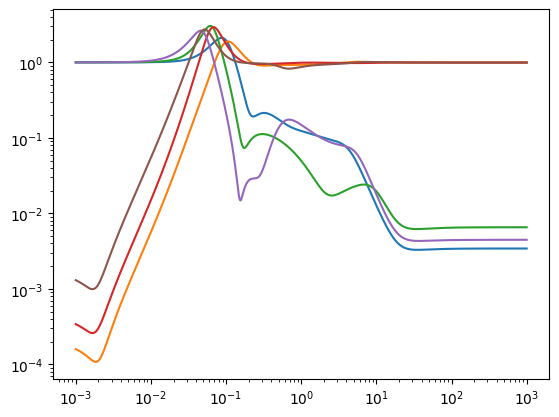

In [88]:
# plt.loglog(f, abs(h_trans_low_low(1j*2*np.pi*f)))
# plt.loglog(f, abs(h_sc_low_low(1j*2*np.pi*f)))

plt.loglog(f, abs(h_trans_low_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(h_sc_low_mid(1j*2*np.pi*f)))

# plt.loglog(f, abs(h_trans_low_high(1j*2*np.pi*f)))
# plt.loglog(f, abs(h_sc_low_high(1j*2*np.pi*f)))

# plt.loglog(f, abs(h_trans_mid_low(1j*2*np.pi*f)))
# plt.loglog(f, abs(h_sc_mid_low(1j*2*np.pi*f)))

plt.loglog(f, abs(h_trans_mid_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(h_sc_mid_mid(1j*2*np.pi*f)))

# plt.loglog(f, abs(h_trans_mid_high(1j*2*np.pi*f)))
# plt.loglog(f, abs(h_sc_mid_high(1j*2*np.pi*f)))

# plt.loglog(f, abs(h_trans_high_low(1j*2*np.pi*f)))
# plt.loglog(f, abs(h_sc_high_low(1j*2*np.pi*f)))

plt.loglog(f, abs(h_trans_high_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(h_sc_high_mid(1j*2*np.pi*f)))

# plt.loglog(f, abs(h_trans_high_high(1j*2*np.pi*f)))
# plt.loglog(f, abs(h_sc_high_high(1j*2*np.pi*f)))

# plt.loglog(f, abs(h_trans_prefilt_low_low(1j*2*np.pi*f)))
# plt.loglog(f, abs(h_sc_prefilt_low_low(1j*2*np.pi*f)))

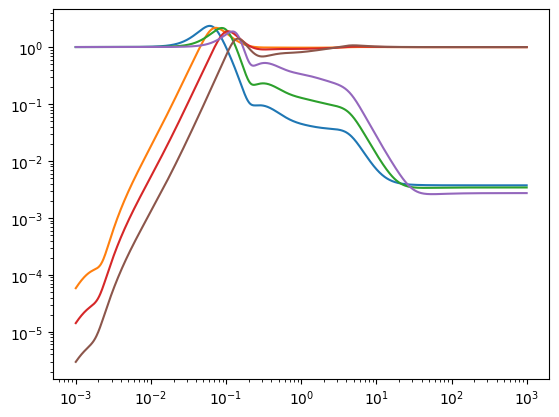

In [89]:
plt.loglog(f, abs(h_trans_prefilt_low_low(1j*2*np.pi*f)))
plt.loglog(f, abs(h_sc_prefilt_low_low(1j*2*np.pi*f)))

plt.loglog(f, abs(h_trans_prefilt_low_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(h_sc_prefilt_low_mid(1j*2*np.pi*f)))

plt.loglog(f, abs(h_trans_prefilt_low_high(1j*2*np.pi*f)))
plt.loglog(f, abs(h_sc_prefilt_low_high(1j*2*np.pi*f)))

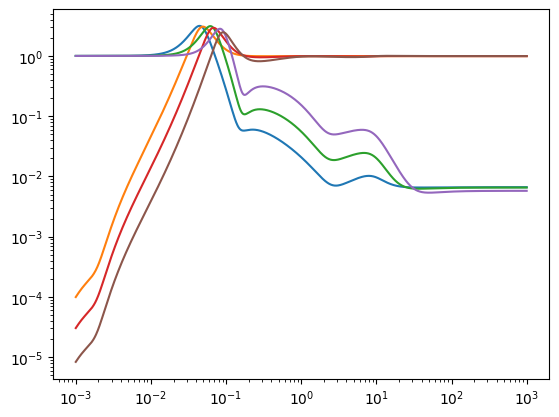

In [90]:
plt.loglog(f, abs(h_trans_prefilt_mid_low(1j*2*np.pi*f)))
plt.loglog(f, abs(h_sc_prefilt_mid_low(1j*2*np.pi*f)))

plt.loglog(f, abs(h_trans_prefilt_mid_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(h_sc_prefilt_mid_mid(1j*2*np.pi*f)))

plt.loglog(f, abs(h_trans_prefilt_mid_high(1j*2*np.pi*f)))
plt.loglog(f, abs(h_sc_prefilt_mid_high(1j*2*np.pi*f)))

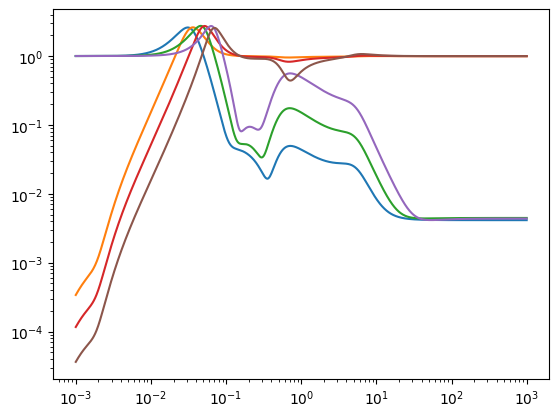

In [91]:
plt.loglog(f, abs(h_trans_prefilt_high_low(1j*2*np.pi*f)))
plt.loglog(f, abs(h_sc_prefilt_high_low(1j*2*np.pi*f)))

plt.loglog(f, abs(h_trans_prefilt_high_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(h_sc_prefilt_high_mid(1j*2*np.pi*f)))

plt.loglog(f, abs(h_trans_prefilt_high_high(1j*2*np.pi*f)))
plt.loglog(f, abs(h_sc_prefilt_high_high(1j*2*np.pi*f)))

In [95]:
h_sc_low_low.save("sensor_correction_filters/h_sc_low_low.pkl")
h_sc_low_mid.save("sensor_correction_filters/h_sc_low_mid.pkl")
h_sc_low_high.save("sensor_correction_filters/h_sc_low_high.pkl")
h_sc_mid_low.save("sensor_correction_filters/h_sc_mid_low.pkl")
h_sc_mid_mid.save("sensor_correction_filters/h_sc_mid_mid.pkl")
h_sc_mid_high.save("sensor_correction_filters/h_sc_mid_high.pkl")
h_sc_high_low.save("sensor_correction_filters/h_sc_high_low.pkl")
h_sc_high_mid.save("sensor_correction_filters/h_sc_high_mid.pkl")
h_sc_high_high.save("sensor_correction_filters/h_sc_high_high.pkl")


In [97]:
prefilter = kontrol.TransferFunction(prefilter)

In [98]:
prefilter.save("sensor_correction_filters/prefilter.pkl")